<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [20]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [40]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [41]:
apple = data

apple.head()

# Open: 시가
# High: 고가
# Low: 저가
# Close: 종가
# Volume: 주식 거래량

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [23]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [42]:
apple.Date = pd.to_datetime(apple.Date)  # 인수를 날짜/시간으로 변환

apple.Date.head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [45]:
apple = apple.set_index('Date')  # set_index: 기존 열을 사용하여 DataFrame 인덱스를 설정

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [43]:
apple.index.is_unique  # is_unique: 개체의 값이 고유하면 부울 반환

True

In [49]:
# another sol
# apple = data
# apple.Date = pd.to_datetime(apple.Date) 

# x = apple[apple.duplicated("Date")]
# if len(x) != 0:
#     print("Yes there are duplicates in date column")
# else:
#     print("No there are no duplicates in date column")

No there are no duplicates in date column


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [27]:
apple.sort_index(ascending = True).head()  # sort_index: 축을 따라 label별로 개체 정렬

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [28]:
apple_month = apple.resample('BM').mean()  # resample: 시계열 데이터(time-series data)를 다시 샘플링

apple_month.head()

# freq = 'D' 일 기준 주기
# freq = 'W' 일주일 주기
# freq = 'W-MON' 월요일 주기
# freq = 'BM' 월말 날짜 기준 주기
# freq = 'QS' 분기 시작 기준 주기
# freq = 'AS' 연도 기준 주기
# freq = 'H' 시간 기준 주기

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


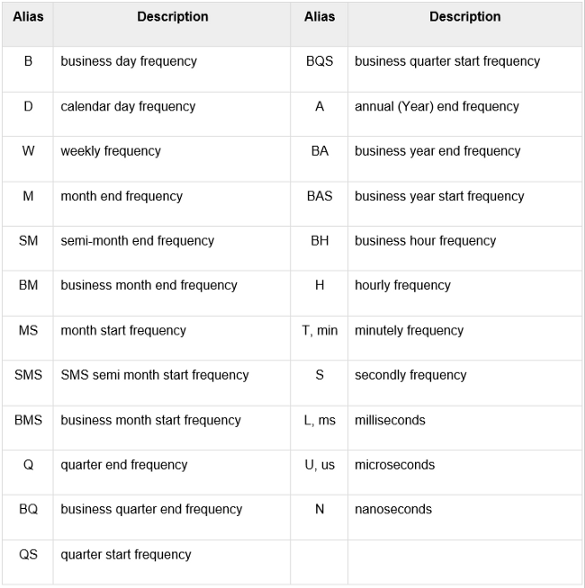

### Step 10.  What is the difference in days between the first day and the oldest

In [29]:
(apple.index.max() - apple.index.min()).days  # days: Number of days for each element

12261

In [30]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [35]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

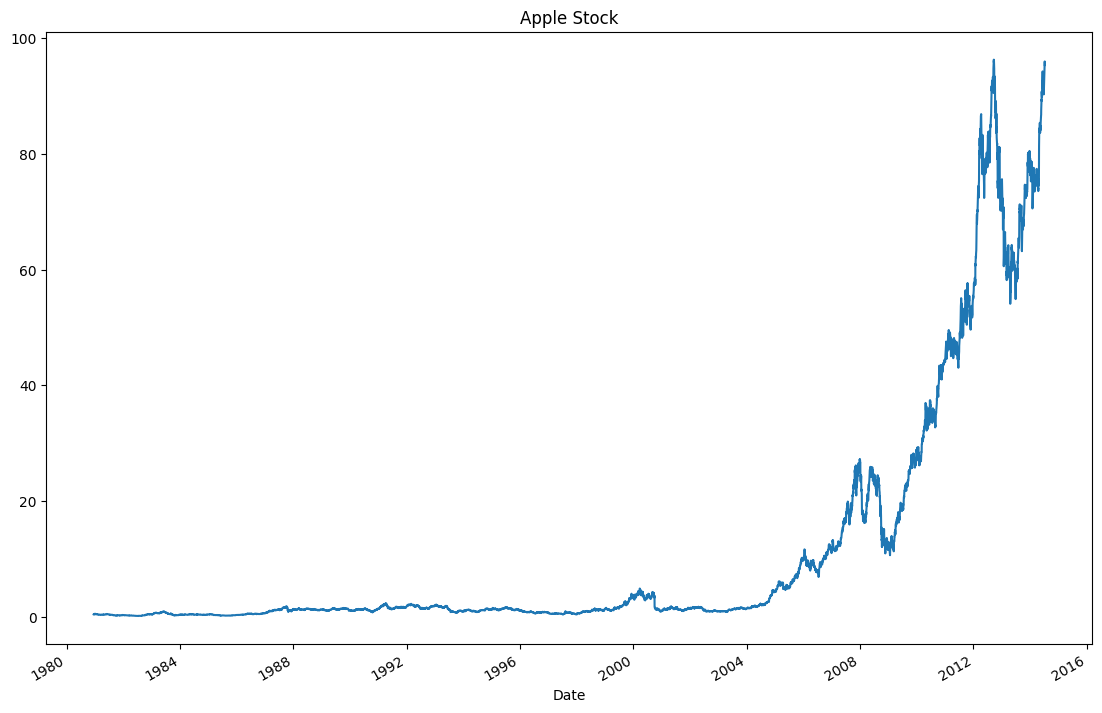

In [32]:
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

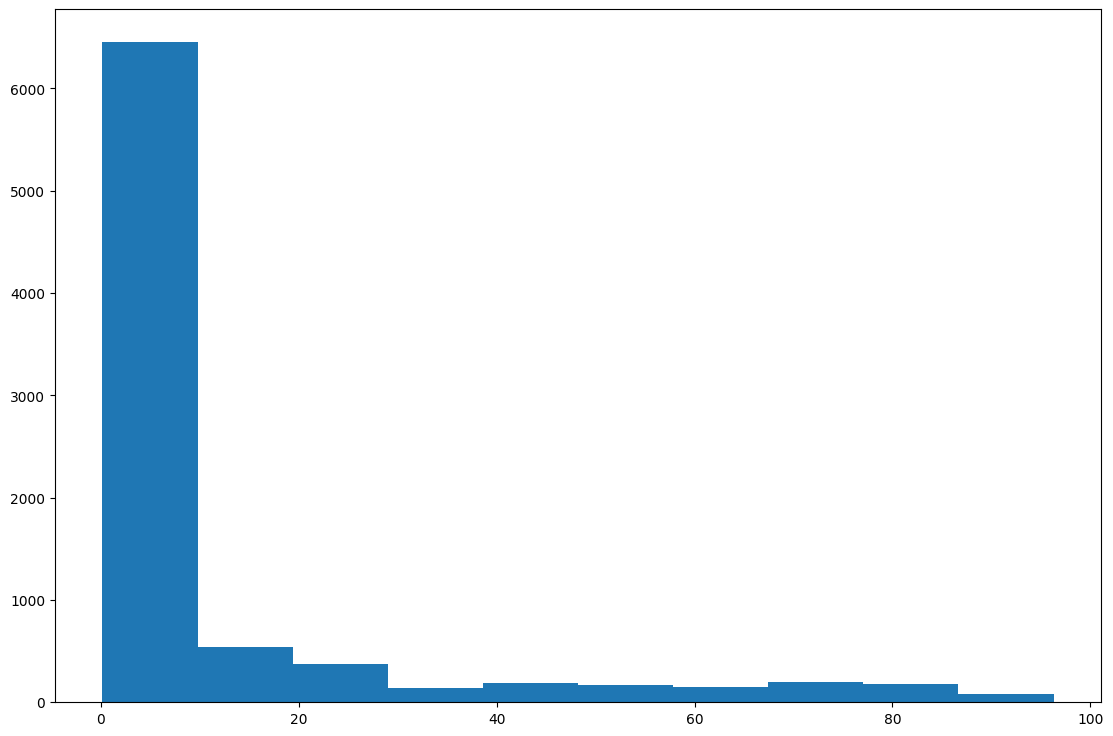

In [33]:
plt.figure(figsize=(13.5, 9))
plt.hist(apple["Adj Close"])
plt.show()